In [5]:
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

import pandas as pd
import numpy as np

import os
os.chdir('/Users/adshah/Documents/Python/Jupyter Notebooks/')


'/Users/adshah/Documents/Python/Jupyter Notebooks'

In [6]:
#read user-book interactions
interactions_df = pd.read_csv('data/goodreads_interactions_mystery_thriller_crime.csv')
print(interactions_df.shape)
interactions_df.head(3)

(24799896, 10)


,book_id,date_added,date_updated,is_read,rating,read_at,review_id,review_text_incomplete,started_at,user_id
0,6392944,Mon Jul 24 02:48:17 -0700 2017,Sun Jul 30 09:28:03 -0700 2017,True,3,Tue Jul 25 00:00:00 -0700 2017,5e212a62bced17b4dbe41150e5bb9037,I haven't read a fun mystery book in a while a...,Mon Jul 24 00:00:00 -0700 2017,8842281e1d1347389f2ab93d60773d4d
1,2279538,Wed Mar 29 00:27:14 -0700 2017,Wed Mar 29 00:27:14 -0700 2017,False,0,NaN,556e9e3f00fb5b7e4eaa116764b771b0,NaN,NaN,8842281e1d1347389f2ab93d60773d4d
2,20821043,Mon Mar 27 22:52:11 -0700 2017,Mon Mar 27 22:52:12 -0700 2017,False,0,NaN,4b15f8a08f04a17f9a47f2b76fec21e5,NaN,NaN,8842281e1d1347389f2ab93d60773d4d


In [8]:
#only keep interactions where the user had read the book
filtered=interactions_df[interactions_df['is_read']==True]

#### We initially thought about splitting the data yearwise. That would be interesting to see how well our recommender system works when trained on past years and is used to predict for current years. However, as we can see in the following code, we are missing "started_at" timestamp for almost 8M user-book interactions. 


In [9]:
filtered['started_year']=filtered['started_at'].map(str).apply(lambda x:x[-4:])

In [10]:
filtered['started_year'].value_counts()

nan     8245609
2017     968260
2016     943340
2015     727660
2014     567668
         ...   
1436          1
0001          1
1917          1
2556          1
1900          1
Name: started_year, Length: 78, dtype: int64

In [11]:
len(filtered[filtered.started_at.isnull()])

8245609

#### It might also be good to remove users who have read < 3 books. We also plot the histogram of all users and the number of books they read:

In [12]:
hist_df=filtered[['user_id','book_id']].groupby('user_id').nunique()

(array([5.95418e+05, 1.34100e+03, 1.81000e+02, 4.30000e+01, 1.80000e+01,
        4.00000e+00, 4.00000e+00, 0.00000e+00, 0.00000e+00, 3.00000e+00]),
 array([1.0000e+00, 4.5350e+02, 9.0600e+02, 1.3585e+03, 1.8110e+03,
        2.2635e+03, 2.7160e+03, 3.1685e+03, 3.6210e+03, 4.0735e+03,
        4.5260e+03]),
 <BarContainer object of 10 artists>)

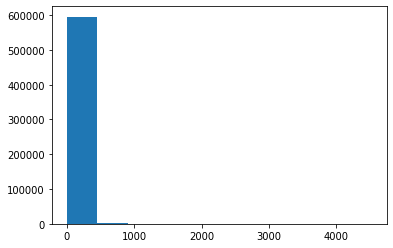

In [16]:
import matplotlib.pyplot as plt 
plt.hist(hist_df['book_id'])

In [20]:
hist_df=hist_df.reset_index()

In [22]:
users_irrelevant=hist_df[hist_df['book_id']<3]['user_id'].tolist()

In [37]:
final_filtered=filtered[~filtered.user_id.isin(users_irrelevant)]

In [41]:
g=final_filtered[['user_id','book_id','rating']].drop_duplicates()

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(g[['user_id','book_id']], g['rating'], test_size=0.2, random_state=42, stratify=g['user_id'])

In [76]:
final_train=pd.concat([X_train,y_train],axis=1)
final_test=pd.concat([X_test,y_test],axis=1)

In [84]:
final_train.to_csv('train.csv', index=False)
final_test.to_csv('test.csv', index= False)